In [62]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Calculate regional means of potential prognostic predictability

In [63]:
import xarray as xr
import numpy as np
import gfdl_utils as gu
import glob
from dask.diagnostics import ProgressBar
from information import *
from processing import *
from variance import *
import os
import re

In [73]:
ppname = 'ocean_month'
frequency = gu.core.get_timefrequency(ppcontrol,ppname)
ppp = xr.open_zarr(ppeDict['datasavedir']+'/processed/ppp/'+ppname+'.zarr')

In [74]:
grid = xr.open_dataset(ppeDict['rootdir']+ppeDict['gridfile'])

In [75]:
masks = generate_masks(grid)

In [76]:
def calc_regionalmean(da,mask,weights):
    return da.where(mask,drop=True).weighted(weights.fillna(0)).mean(['xh','yh'])

In [77]:
savedir = ppeDict['datasavedir']+'/processed/ppp_regionalmeans/'
for name,mask in masks.items():
    if mask.any():
        tmp = calc_regionalmean(ppp,mask,grid['areacello'])
    else:
        print(name+' is an empty mask.')
        continue
    for variable,da in tmp.items():
        savefilename = '.'.join([variable,frequency,name,'nc'])
        if os.path.isfile(savedir+savefilename):
            print(savefilename+' already exists.')
            continue
        else:
            print('Saving '+savefilename)
            with ProgressBar():
                da.to_netcdf(savedir+savefilename)

Saving MLD_003.monthly.global.nc
[########################################] | 100% Completed | 649.47 ms
Saving sos.monthly.global.nc
[########################################] | 100% Completed | 731.39 ms
Saving tos.monthly.global.nc
[########################################] | 100% Completed | 640.13 ms
Saving MLD_003.monthly.global_SoP.nc
[########################################] | 100% Completed | 316.57 ms
Saving sos.monthly.global_SoP.nc
[########################################] | 100% Completed | 316.46 ms
Saving tos.monthly.global_SoP.nc
[########################################] | 100% Completed | 319.44 ms
Saving MLD_003.monthly.global_SoSubP.nc
[########################################] | 100% Completed | 312.13 ms
Saving sos.monthly.global_SoSubP.nc
[########################################] | 100% Completed | 313.49 ms
Saving tos.monthly.global_SoSubP.nc
[########################################] | 100% Completed | 312.83 ms
Saving MLD_003.monthly.global_SoSubT.nc
[#####

In [60]:
ds = xr.open_dataset('/projects/SOCCOM/graemem/projects/esm4_ppe/data/processed/ppp_regionalmeans/intppdiaz.monthly.atlantic.nc')

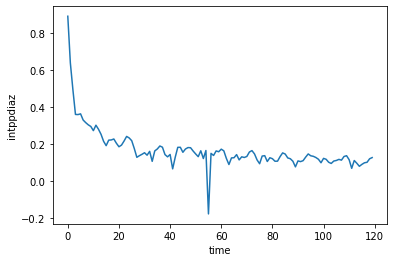

In [61]:
ds['intppdiaz'].plot()